# Continuous Control

---

Code for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.19 which is incompatible.


In [2]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import importlib
import time
import torch

# Import custom agent
import ddpg_agent

# Import Workspace Utils to work on Udacity workspace
from workspace_utils import active_session

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [3]:
#env = UnityEnvironment(file_name='./Reacher_Linux/Reacher.x86_64') # Unity env with Viz
# env = UnityEnvironment(file_name='./Reacher_Linux_NoVis/Reacher.x86_64') # Unity env without Viz
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64') # Unity for Udacity workspace

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
print('Shape State Space', states.shape)
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
Shape State Space (20, 33)
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

Watch agent's performance, when it selects actions at random at each timestep

In [6]:
"""
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))
"""

"\nenv_info = env.reset(train_mode=False)[brain_name]     # reset the environment    \nstates = env_info.vector_observations                  # get the current state (for each agent)\nscores = np.zeros(num_agents)                          # initialize the score (for each agent)\nwhile True:\n    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)\n    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1\n    env_info = env.step(actions)[brain_name]           # send all actions to tne environment\n    next_states = env_info.vector_observations         # get next state (for each agent)\n    rewards = env_info.rewards                         # get reward (for each agent)\n    dones = env_info.local_done                        # see if episode finished\n    scores += env_info.rewards                         # update the score (for each agent)\n    states = next_states                               # roll over states to next ti

### 4. Train Model using DDPG

In [7]:
# Initialize Target Parameters as in "The Environment - Introduction"
average_target_score = 30 # goal average target score to reach
n_consecutive_episodes = 100 # consecutive episodes to average over

In [8]:
importlib.reload(ddpg_agent)

<module 'ddpg_agent' from '/home/workspace/ddpg_agent.py'>

In [9]:
# initiate agent
agent = ddpg_agent.Agent(state_size=state_size, action_size=action_size, random_seed=2)

In [10]:
def ddpg(n_episodes=1000, max_t=1000, print_every=n_consecutive_episodes):
    """
    Deep Deterministic Policy Gradients
    """
    scores_deque = deque(maxlen=n_consecutive_episodes)
    scores = []
    for i_episode in range(1, n_episodes+1):
        # Start timing
        time_start_episode = time.time()
        
        # Reset environment
        env_info = env.reset(train_mode=True)[brain_name] 
        states = env_info.vector_observations  
        n_agents = states.shape[0] # shape in example env. (20,33)
        
        # Reset agent
        agent.reset()
        # Array to keep track of individual agent scores
        agent_scores_individual = np.zeros(n_agents)
        
        # Loop over time
        for t in range(max_t):
            # Adapted multi-agent actions
            # ----------------------
            # initialize actions array
            actions = agent.act(states) # actions.shape = (20,4)
            # ----------------------
            
            # Interact with environment using new actions
            # ----------------------
            env_info = env.step(actions)[brain_name] # send all actions to the environment
            next_states = env_info.vector_observations # get next state (for each agent)
            rewards = env_info.rewards # get reward (for each agent)
            dones = env_info.local_done # see if episode finished
            # ----------------------
            
            # Adapted multi-agent step:
            # ----------------------
            # loop over all agents to perform individual steps
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step_multi(state, action, reward, next_state, done, t)
            # ----------------------

            agent_scores_individual += rewards # update the score (for each agent)
            states = next_states # roll over states to next time step
            
            if np.any(dones): # exit loop if episode finished
                break

        # For each episode calculate mean score overall individual agents
        mean_score = np.mean(agent_scores_individual)
          
        # Add mean score to scores
        scores_deque.append(mean_score)
        mean_scores_deque = np.mean(scores_deque)
        scores.append(mean_score)
        
        # Print episode result
        time_end_episode = time.time()
        average_time_per_episode = (time_end_episode-time_start_episode)
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}\tEpisode Time s: {:.2f}'.format(i_episode, 
                                                                                                  mean_scores_deque, 
                                                                                                  mean_score, 
                                                                                                  average_time_per_episode))
        
        # Print update after print_every
        if i_episode % print_every == 0:
            print('Save model')
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, mean_scores_deque))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        # stop training once target score is reached   
        if mean_scores_deque >= average_target_score:
            print('\rEnvironment solved at Episode {}\tAverage Score: {:.2f}'.format(i_episode-n_consecutive_episodes, mean_scores_deque))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_final.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_final.pth')
            break
            
    return scores

In [11]:
# Uncomment when working on Udacity workspace
with active_session():
    scores = ddpg(n_episodes=2000, max_t=1000, print_every=10)

Episode 1	Average Score: 0.74	Score: 0.74	Episode Time s: 171.76
Episode 2	Average Score: 1.19	Score: 1.64	Episode Time s: 146.22
Episode 3	Average Score: 1.45	Score: 1.97	Episode Time s: 146.99
Episode 4	Average Score: 1.91	Score: 3.28	Episode Time s: 148.23
Episode 5	Average Score: 2.12	Score: 2.95	Episode Time s: 149.47
Episode 6	Average Score: 2.42	Score: 3.95	Episode Time s: 150.42
Episode 7	Average Score: 2.66	Score: 4.12	Episode Time s: 152.09
Episode 8	Average Score: 2.84	Score: 4.04	Episode Time s: 153.96
Episode 9	Average Score: 3.04	Score: 4.70	Episode Time s: 155.62
Episode 10	Average Score: 3.21	Score: 4.71	Episode Time s: 157.74
Save model
Episode 10	Average Score: 3.21
Episode 11	Average Score: 3.53	Score: 6.68	Episode Time s: 159.61
Episode 12	Average Score: 3.83	Score: 7.17	Episode Time s: 161.55
Episode 13	Average Score: 4.08	Score: 7.12	Episode Time s: 164.04
Episode 14	Average Score: 4.26	Score: 6.56	Episode Time s: 167.79
Episode 15	Average Score: 4.56	Score: 8.70	

In [12]:
#scores = ddpg(n_episodes=2000, max_t=1000, print_every=10)

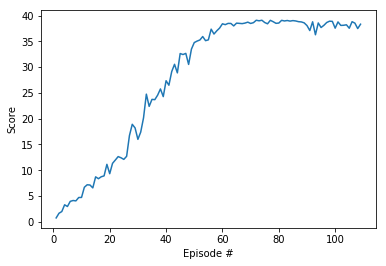

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('./Plots/Average_scores.png')
plt.show()

### 5. Close Environment

In [ ]:
env.close()